<a href="https://colab.research.google.com/github/NataliiaHromyk/HomeWork_Python_DS/blob/main/Hromyk_%22HW_2_1_%D0%9B%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B2%D1%96%D0%B4_%D0%B1%D0%B0%D0%B3%D0%B0%D1%82%D1%8C%D0%BE%D1%85_%D0%B7%D0%BC%D1%96%D0%BD%D0%BD%D0%B8%D1%85_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [200]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [201]:
from google.colab import drive
drive.mount('/content/drive')

cars = pd.read_csv('drive/MyDrive/ML_files/cars.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [202]:
cars[:5]

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [203]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
?pd.DataFrame.info

In [204]:
cars.shape

(100, 13)

In [205]:
cars.info(verbose = True,  show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [206]:
cars.select_dtypes(include = "object").columns

Index(['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type'], dtype='object')

In [207]:
# Перевірка кількості категоріальних змінних
len(cars.select_dtypes(include = "object").columns)

5

In [208]:
cars.select_dtypes(include="object").nunique()

,0
Brand,11
Model,58
Fuel_Type,2
Transmission,2
Owner_Type,3


In [209]:
cars.select_dtypes(include="object")

,Brand,Model,Fuel_Type,Transmission,Owner_Type
0,Toyota,Corolla,Petrol,Manual,First
1,Honda,Civic,Petrol,Automatic,Second
2,Ford,Mustang,Petrol,Automatic,First
3,Maruti,Swift,Diesel,Manual,Third
4,Hyundai,Sonata,Diesel,Automatic,Second
...,...,...,...,...,...
95,Mercedes,C-Class,Diesel,Automatic,First
96,Toyota,Innova Crysta,Diesel,Manual,Second
97,Ford,EcoSport,Petrol,Manual,Third
98,Hyundai,Verna,Petrol,Automatic,Second


In [210]:
cars.select_dtypes(include="number")

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,1,2018,50000,15,1498,108,5,800000
1,2,2019,40000,17,1597,140,5,1000000
2,3,2017,20000,10,4951,395,4,2500000
3,4,2020,30000,23,1248,74,5,600000
4,5,2016,60000,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...
95,96,2019,22000,16,1950,191,5,2900000
96,97,2017,38000,13,2755,171,7,1400000
97,98,2018,26000,18,1497,121,5,750000
98,99,2019,24000,17,1497,113,5,850000


In [211]:
len(cars.select_dtypes(include="number").columns)

8

In [212]:
cars.select_dtypes(include="number").nunique()

,0
Car_ID,100
Year,6
Kilometers_Driven,18
Mileage,15
Engine,36
Power,40
Seats,3
Price,31


In [213]:
cars.describe()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,50.500000,2018.39000,28150.000000,17.210000,1855.230000,158.130000,5.230000,1.574000e+06
std,29.011492,1.17116,9121.375716,3.309902,631.311475,76.968137,0.750151,1.000265e+06
min,1.000000,2016.00000,10000.000000,10.000000,999.000000,68.000000,4.000000,4.500000e+05
25%,25.750000,2017.75000,22000.000000,15.000000,1462.000000,103.000000,5.000000,7.000000e+05
50%,50.500000,2018.00000,27000.000000,17.000000,1774.000000,148.000000,5.000000,1.300000e+06
75%,75.250000,2019.00000,32000.000000,19.000000,2143.000000,187.000000,5.000000,2.500000e+06
max,100.000000,2021.00000,60000.000000,25.000000,4951.000000,396.000000,7.000000,4.000000e+06


В наборі даних 8 числових і 5 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення -  Fuel_Type, Transmission)
- 3 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 4 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large) - Kilometers_Driven, Mileage,	Engine,	Power

3 з категоріальних можна перевести в числову (Fuel_Type, Transmission, Оwner_Type).

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [214]:
from sklearn.model_selection import train_test_split

In [215]:
? train_test_split

In [216]:
X_train, X_test, y_train, y_test = train_test_split(cars, cars.Price, test_size=0.2, random_state=12)

In [217]:
def train_model_show_rmse(inputs, targets):
  model = LinearRegression().fit(inputs, targets)
  predictions = model.predict(inputs)
  loss = mean_squared_error(targets, predictions)**0.5
  print('Loss:', loss)
  return model

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [218]:
cars.Fuel_Type.value_counts()

,count
Fuel_Type,
Petrol,52
Diesel,48


In [219]:
X_train['Fuel_Type_code'] = X_train.Fuel_Type.map({'Diesel': 0, 'Petrol': 1})
X_test['Fuel_Type_code'] = X_test.Fuel_Type.map({'Diesel': 0, 'Petrol': 1})

In [220]:
X_train.Price.corr(X_train.Fuel_Type_code)

np.float64(-0.110782246623349)

In [221]:
cars.Transmission.value_counts()

,count
Transmission,
Automatic,57
Manual,43


In [222]:
X_train['Transmission_code'] = X_train.Transmission.map({'Manual': 0, 'Automatic': 1})
X_test['Transmission_code'] = X_test.Transmission.map({'Manual': 0, 'Automatic': 1})

In [223]:
X_train.Price.corr(X_train.Transmission_code)

np.float64(0.6807314925873994)

Присутня сильна позитивна кореляція

In [224]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(X_train[['Brand']])
enc.categories_

[array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
        'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)]

In [225]:
one_hot = enc.transform(X_test[['Brand']]).toarray()
one_hot

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.

In [226]:
enc.categories_[0]

array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
       'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)

In [227]:
X_test[enc.categories_[0]] = one_hot
X_test

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1900000,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,450000,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,650000,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,850000,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,600000,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,32,Hyundai,Elantra,2017,32000,Diesel,Automatic,Second,22,1582,126,5,800000,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
89,90,Hyundai,Venue,2018,32000,Petrol,Manual,Third,17,1197,81,5,550000,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
15,16,Honda,City,2017,42000,Diesel,Manual,Second,25,1498,98,5,650000,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,22,Ford,Figo,2020,15000,Petrol,Manual,Third,18,1194,94,5,550000,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,61,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [228]:
one_hot_train = enc.transform(X_train[['Brand']]).toarray()

In [229]:
X_train[enc.categories_[0]] = one_hot_train


In [230]:
pd.set_option('display.max_columns', 100)
display(X_train.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1600000,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,2600000,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,3200000,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,650000,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,2500000,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [231]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [232]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1600000,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,2600000,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,3200000,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,650000,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,2500000,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1900000,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,450000,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,650000,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,850000,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,600000,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

перейменували значення в 0,1,2 - розрахунок розпочинається з нуля, де 0 - First, 1 - Second, 2- Third. Перевівши в числовий формат це дозволить побудувати модель на даних

In [233]:
X_train.Price.corr(X_train.Owner_Type_Codes),  X_test.Price.corr(X_test.Owner_Type_Codes)

(np.float64(-0.2655371657781789), np.float64(-0.4317493408209546))

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [234]:
X_train_num = X_train.select_dtypes(include="number")
X_test_num = X_test.select_dtypes(include="number")

In [235]:
X_train_num.drop(columns = ['Car_ID', 'Price'], inplace = True)
X_test_num.drop(columns = ['Car_ID', 'Price'], inplace = True)

In [236]:
Train_full = pd.concat([X_train_num, y_train], axis=1)
Train_full

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Price
83,2019,22000,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1600000
55,2018,28000,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2600000
26,2018,28000,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3200000
54,2017,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,650000
19,2017,26000,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,2020,30000,23,1248,74,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,600000
2,2017,20000,10,4951,395,4,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2500000
6,2018,45000,15,2179,140,7,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,900000
27,2019,22000,18,1995,187,5,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2800000


In [237]:
Train_full.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Price
Year,1.000000,-0.708525,0.278559,-0.392764,-0.248442,-0.278755,0.248515,-0.200603,-0.256523,0.202517,-0.150454,-0.037437,-0.092099,0.181669,0.285094,-0.115157,0.248715,-0.219346,0.018255,-0.014499,-0.233769
Kilometers_Driven,-0.708525,1.000000,-0.126621,0.101219,-0.060803,0.403656,-0.332351,-0.066491,0.095879,-0.247042,-0.009761,0.057372,0.154362,-0.040344,-0.190420,-0.091731,0.030399,0.368519,-0.137675,-0.001772,-0.083951
Mileage,0.278559,-0.126621,1.000000,-0.710516,-0.684705,-0.178619,-0.070112,-0.399164,-0.152701,-0.134105,-0.296480,0.358630,0.217406,0.029427,0.116389,-0.238489,0.347678,-0.201565,0.085114,0.026624,-0.638404
Engine,-0.392764,0.101219,-0.710516,1.000000,0.801638,0.167326,-0.174455,0.456296,0.085153,0.287119,0.184231,-0.154491,-0.182213,-0.024973,-0.193257,0.163871,-0.340051,0.234889,-0.165115,-0.196106,0.710561
Power,-0.248442,-0.060803,-0.684705,0.801638,1.000000,-0.139388,0.076357,0.586910,0.157050,0.372652,0.240501,-0.191810,-0.170966,-0.118021,-0.220984,0.280827,-0.316989,-0.040478,-0.148437,-0.204309,0.849137
Seats,-0.278755,0.403656,-0.178619,0.167326,-0.139388,1.000000,-0.412468,-0.070099,0.123674,-0.108079,-0.161451,0.200303,-0.086439,0.007738,-0.078379,-0.108079,-0.012748,0.348535,-0.094002,-0.043849,0.000979
Fuel_Type_code,0.248515,-0.332351,-0.070112,-0.174455,0.076357,-0.412468,1.000000,-0.005775,-0.008336,-0.048475,0.109812,-0.161425,-0.007121,-0.235225,0.148511,-0.048475,0.066164,-0.008336,0.125010,0.281122,-0.110782
Transmission_code,-0.200603,-0.066491,-0.399164,0.456296,0.586910,-0.070099,-0.005775,1.000000,0.265132,0.283188,-0.122816,-0.218620,0.031659,-0.170703,-0.112622,0.283188,-0.397609,-0.076974,0.155500,0.005886,0.680731
Audi,-0.256523,0.095879,-0.152701,0.085153,0.157050,0.123674,-0.008336,0.265132,1.000000,-0.118678,-0.118678,-0.086066,-0.094916,-0.076472,-0.086066,-0.118678,-0.125988,-0.111111,-0.103221,-0.203925,0.328858
BMW,0.202517,-0.247042,-0.134105,0.287119,0.372652,-0.108079,-0.048475,0.283188,-0.118678,1.000000,-0.126761,-0.091928,-0.101380,-0.081680,-0.091928,-0.126761,-0.134568,-0.118678,-0.110250,0.009076,0.477522


In [238]:
corr_train = Train_full.corr()

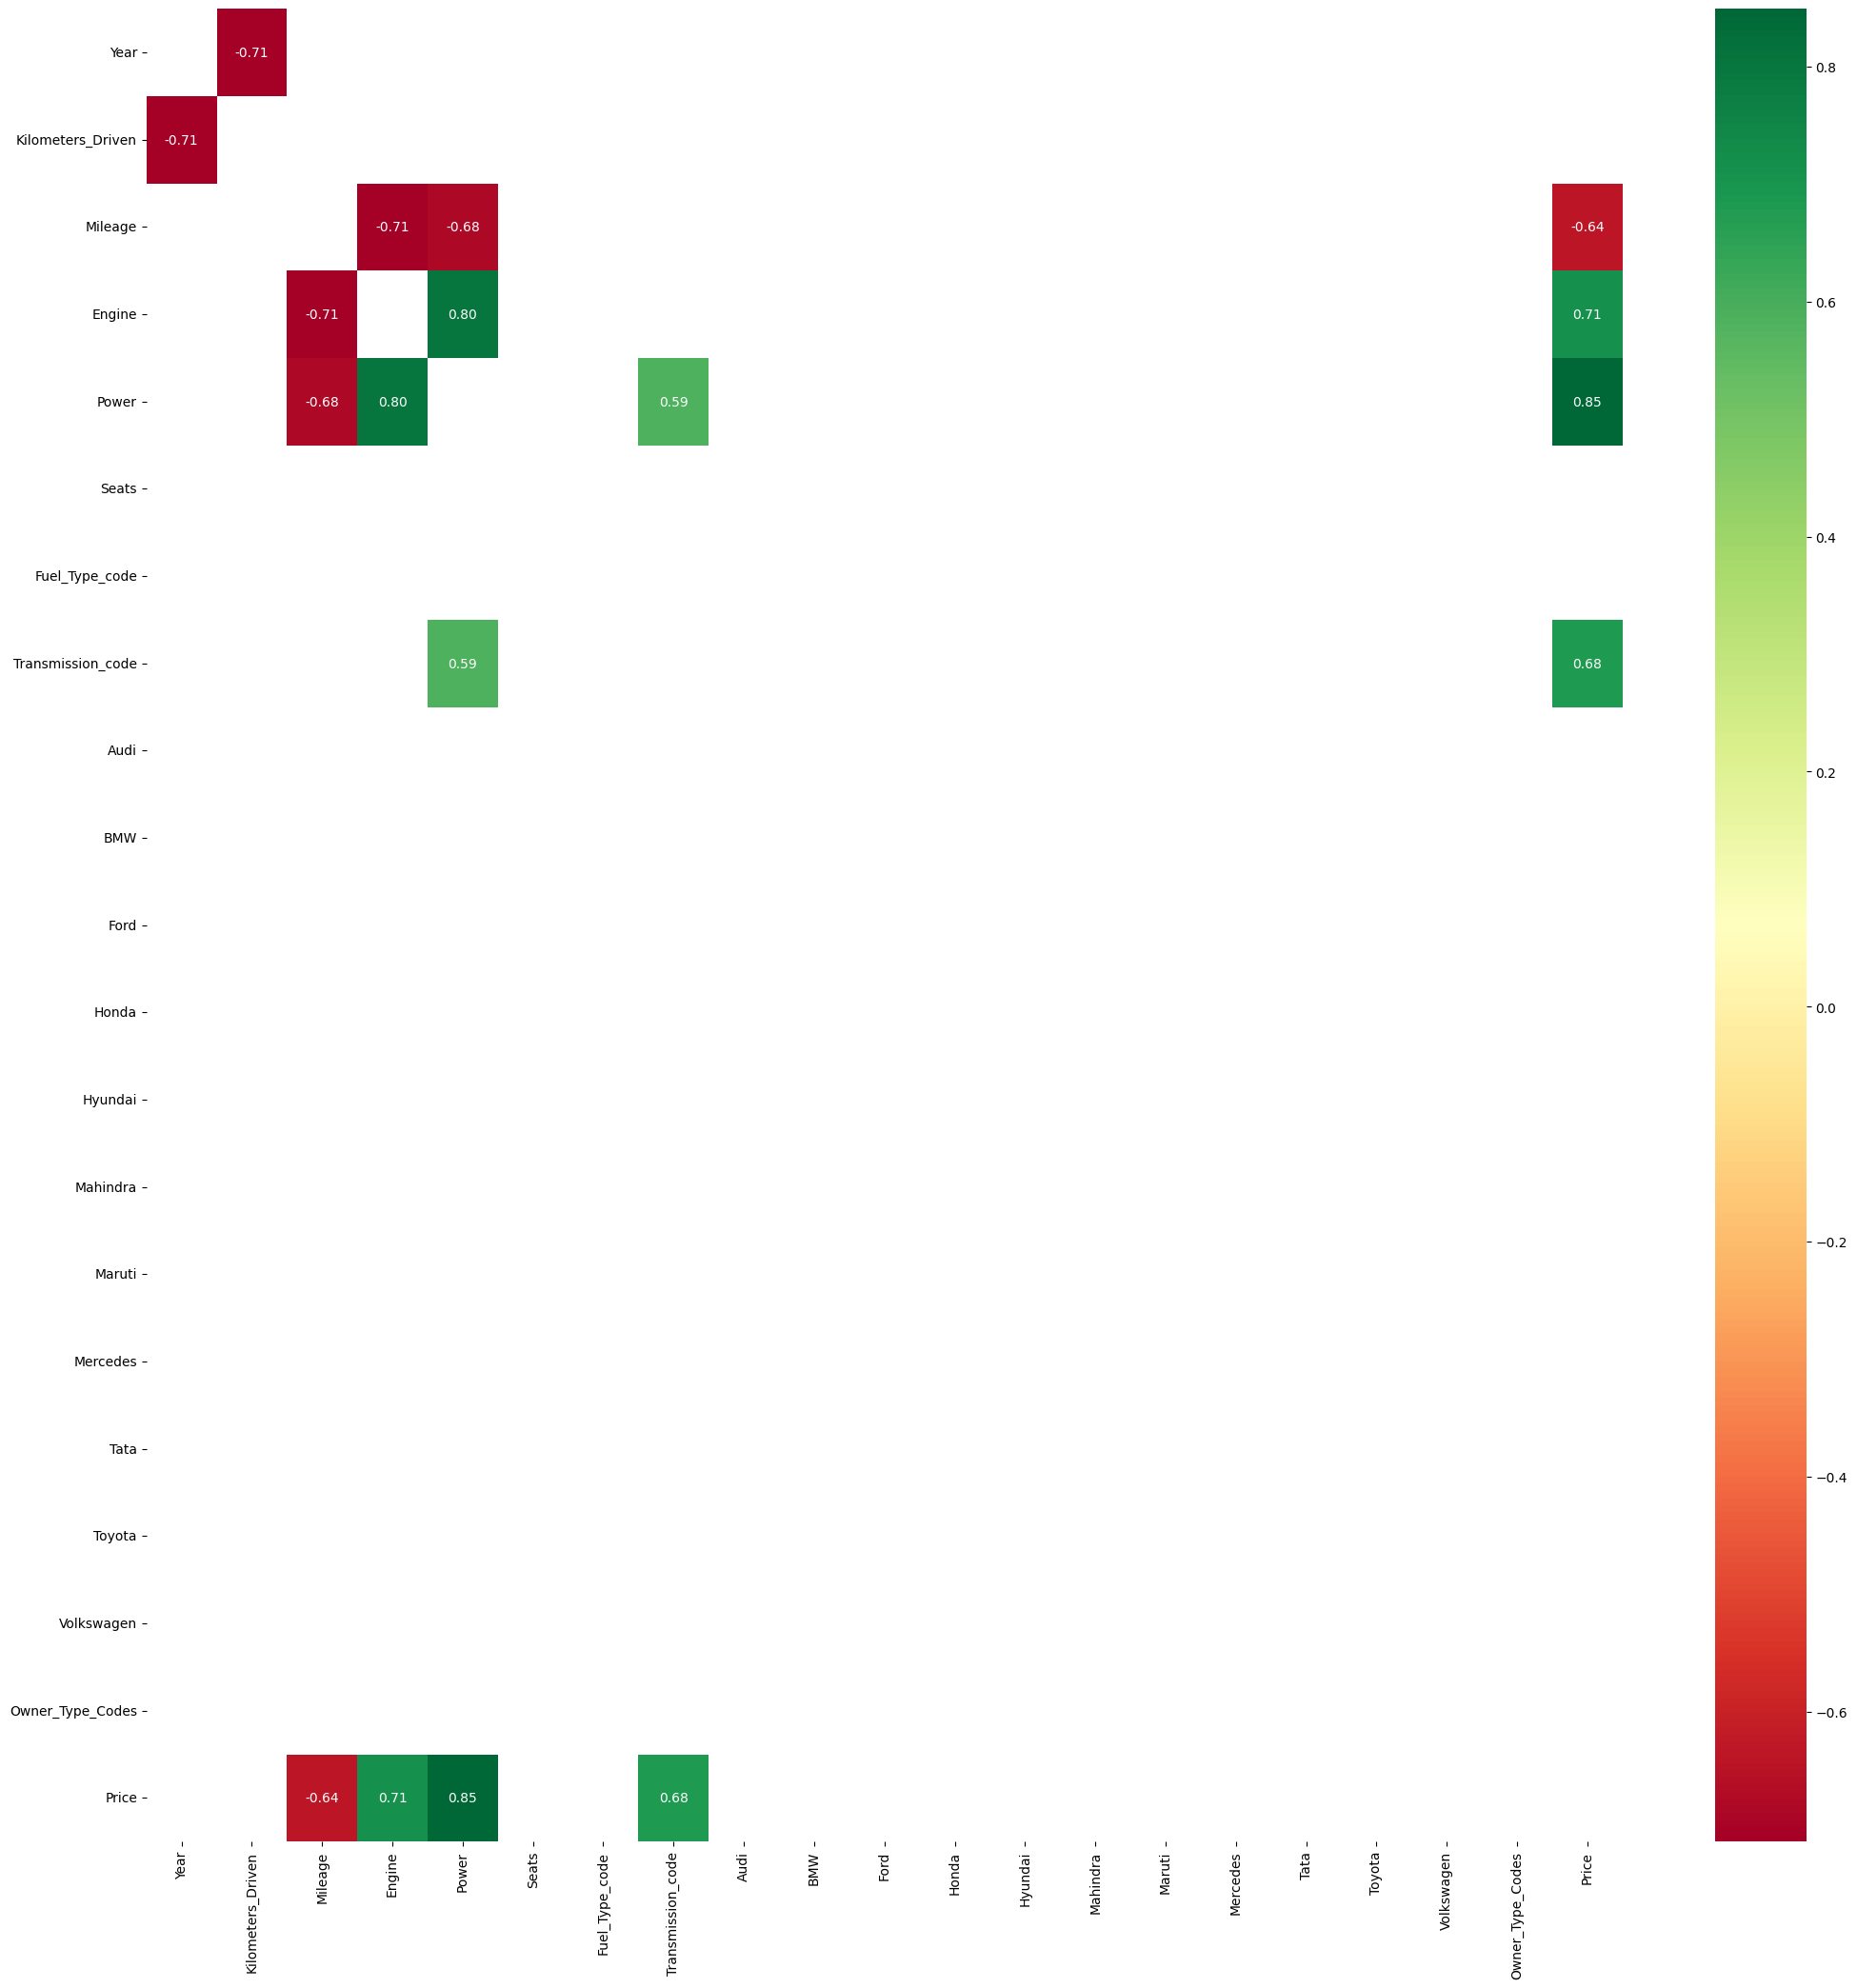

In [239]:
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_train[(corr_train.abs() <= 0.9999) & (corr_train.abs() > 0.5)], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

In [240]:
corr_train[(corr_train.abs() <= 0.9999) & (corr_train.abs() > 0.5)].unstack().sort_values(ascending = False).head(18)

Power              Price                0.849137
Price              Power                0.849137
Power              Engine               0.801638
Engine             Power                0.801638
                   Price                0.710561
Price              Engine               0.710561
Transmission_code  Price                0.680731
Price              Transmission_code    0.680731
Transmission_code  Power                0.586910
Power              Transmission_code    0.586910
Mileage            Price               -0.638404
Price              Mileage             -0.638404
Power              Mileage             -0.684705
Mileage            Power               -0.684705
Kilometers_Driven  Year                -0.708525
Year               Kilometers_Driven   -0.708525
Mileage            Engine              -0.710516
Engine             Mileage             -0.710516
dtype: float64

Оскільки у нас є комбінації, що повторюються, дивлячись на наведену вище таблицю і видаляючи дублі, ми отримуємо топ-10 кореляцій, як показано нижче:


*   Power	Price	0.849137
*   Power	Engine	0.801638
*   Price	Engine 0.710561
*   Transmission_code	Price	0.680731
*   Power	Transmission_code	0.586910
*   Price	Mileage	-0.638404
*   Power	Mileage	-0.684705
*   Kilometers_Driven	Year	-0.708525
*   Mileage	Engine	-0.710516




**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [241]:
# X_train_num, X_test_num

In [242]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [243]:
model = LinearRegression().fit(X_train_num, y_train)
predictions_test = model.predict(X_test_num)
loss = mean_squared_error(y_test, predictions_test)**0.5
print('Test Loss:', loss)

Test Loss: 259601.2654272335


In [244]:
predictions_train = model.predict(X_train_num)
loss = mean_squared_error(y_train, predictions_train)**0.5
print('Training Loss:', loss)

Training Loss: 210342.8016204638


In [245]:
y_train.describe()

,Price
count,8.000000e+01
mean,1.680000e+06
std,1.040405e+06
min,4.500000e+05
25%,7.000000e+05
50%,1.500000e+06
75%,2.700000e+06
max,4.000000e+06


In [246]:
def normal_equations(X,y):
    """Computes the closed-form solution to linear regression"""
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [247]:
MNK_coefs = normal_equations(X_train_num, y_train)
predictions_MNK = np.dot(X_test_num, MNK_coefs)

r2 = r2_score(y_test, predictions_MNK)

print(f"R² score: {r2:.20f}")

R² score: 0.85098326845397453955


як результат, у нас модель виходить дуже хорошою - показник R2 становить 0,85, що дуже добрте

In [248]:
weights_df = pd.DataFrame({
    'feature': np.append(X_test_num.columns.tolist(), 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
20,1,2.252979e+07
8,Audi,7.588030e+05
15,Mercedes,7.339747e+05
9,BMW,7.303268e+05
7,Transmission_code,2.363676e+05
17,Toyota,1.304575e+05
19,Owner_Type_Codes,6.627831e+04
4,Power,6.140756e+03
1,Kilometers_Driven,-1.087444e+01
3,Engine,-3.758587e+01


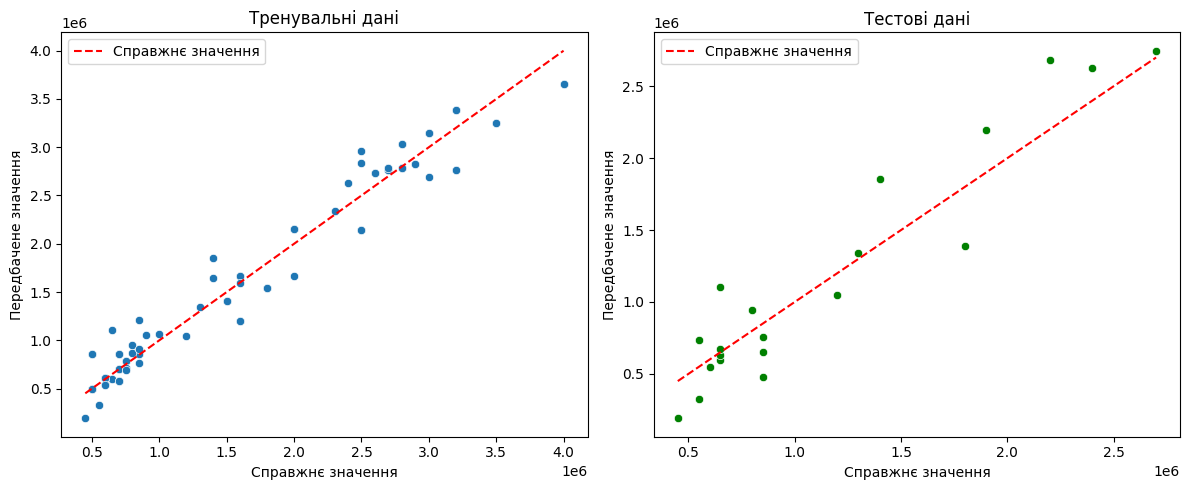

In [249]:
import matplotlib.pyplot as plt
import seaborn as sns

# Для тренувальної вибірки
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=predictions_train)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label='Справжнє значення')  # ідеальна лінія
plt.xlabel("Справжнє значення")
plt.ylabel("Передбачене значення")
plt.title("Тренувальні дані")
plt.legend()

# Для тестової вибірки
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=predictions_test, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Справжнє значення')
plt.xlabel("Справжнє значення")
plt.ylabel("Передбачене значення")
plt.title("Тестові дані")

plt.tight_layout()
plt.legend()
plt.show()


Модель виходить дуже хорошою - показник R2 становить 0,85, що дуже добре. Окрім цього, точки передбачень і реальних значень близькі один до одного - ми це можемо переглянути по графіку розсіювання вище


**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [250]:
X_train_num.nunique()

,0
Year,6
Kilometers_Driven,17
Mileage,15
Engine,35
Power,37
Seats,3
Fuel_Type_code,2
Transmission_code,2
Audi,2
BMW,2


In [251]:
from sklearn.preprocessing import StandardScaler

In [252]:
numeric_cols = ['Year', 'Kilometers_Driven', 'Mileage','Engine','Power','Seats']
scaler = StandardScaler()
scaler.fit(X_train_num[numeric_cols])

StandardScaler()

In [253]:
scaler.mean_

array([2.0183625e+03, 2.8362500e+04, 1.7062500e+01, 1.9107375e+03,
       1.6688750e+02, 5.2250000e+00])

In [254]:
scaler.var_

array([1.25609375e+00, 8.40810938e+07, 1.16335937e+01, 4.31270294e+05,
       6.62974984e+03, 5.49375000e-01])

In [255]:
scaled_inputs = scaler.transform(X_train_num[numeric_cols])
scaled_inputs

array([[ 5.68812539e-01, -6.93870812e-01,  2.74861764e-01,
        -6.28491136e-01, -2.31966840e-01, -3.03562466e-01],
       [-3.23442424e-01, -3.95329146e-02, -1.83241176e-02,
         8.71957932e-02,  2.47011678e-01, -3.03562466e-01],
       [-3.23442424e-01, -3.95329146e-02, -6.04695881e-01,
         1.11559604e-01,  9.10212703e-01, -3.03562466e-01],
       [-1.21569739e+00,  3.96692350e-01,  2.74861764e-01,
        -4.76217321e-01, -7.84634361e-01, -3.03562466e-01],
       [-1.21569739e+00, -2.57645547e-01, -1.48425353e+00,
         1.22218771e-01,  9.10212703e-01, -3.03562466e-01],
       [ 5.68812539e-01, -6.93870812e-01, -3.11509999e-01,
         5.97865065e-02,  2.96137680e-01, -3.03562466e-01],
       [-1.21569739e+00,  1.78579718e-01, -8.97881762e-01,
         1.60841120e+00,  9.59338705e-01,  2.39477056e+00],
       [ 1.46106750e+00, -1.13009608e+00,  8.61233527e-01,
        -1.08378984e+00, -1.00570137e+00, -3.03562466e-01],
       [-1.21569739e+00,  1.05103025e+00, -3.115

In [256]:
cat_cols = ['Fuel_Type_code', 'Transmission_code', 'Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Tata', 'Toyota', 'Volkswagen', 'Owner_Type_Codes']
categorical_data = X_train_num[cat_cols].values
categorical_data

array([[1., 1., 0., ..., 0., 1., 1.],
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [257]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = y_train

model_sc = train_model_show_rmse(inputs, targets)

Loss: 210342.80162046402


In [258]:
column_names = numeric_cols + cat_cols

In [259]:
inputs_df = pd.DataFrame(inputs, columns=column_names)
inputs_df

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
0,0.568813,-0.693871,0.274862,-0.628491,-0.231967,-0.303562,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,-0.323442,-0.039533,-0.018324,0.087196,0.247012,-0.303562,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.323442,-0.039533,-0.604696,0.111560,0.910213,-0.303562,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.215697,0.396692,0.274862,-0.476217,-0.784634,-0.303562,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,-1.215697,-0.257646,-1.484254,0.122219,0.910213,-0.303562,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1.461068,0.178580,1.740791,-1.009176,-1.140798,-0.303562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
76,-1.215697,-0.911983,-2.070625,4.629524,2.801564,-1.652729,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,-0.323442,1.814424,-0.604696,0.408494,-0.330219,2.394771,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
78,0.568813,-0.693871,0.274862,0.128310,0.247012,-0.303562,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [260]:
MNK_coefs = normal_equations(inputs, targets)
predictions_MNK = np.dot(inputs, MNK_coefs)

r2 = r2_score(targets, predictions_MNK)

print(f"R² score: {r2:.20f}")

R² score: 0.95860831060208773202


In [261]:
scaled_inputs_test = scaler.transform(X_test_num[numeric_cols])
categorical_data_test = X_test_num[cat_cols].values
inputs_test = np.concatenate((scaled_inputs_test, categorical_data_test), axis=1)
targets_test = y_test


In [262]:
predictions_test = model_sc.predict(inputs_test)
loss = mean_squared_error(targets_test, predictions_test)**0.5
print('Loss:', loss)

Loss: 259601.2654272347


In [263]:
MNK_coefs = normal_equations(inputs, targets)
predictions_MNK = np.dot(inputs_test, MNK_coefs)

r2 = r2_score(targets_test, predictions_MNK)

print(f"R² score: {r2:.20f}")

R² score: 0.85098326807866930821


Показник R2 по методу StandardScaler не відрізняєьться від показників попередньої моделі.

In [264]:
weights_df = pd.DataFrame({
    'feature': np.append(column_names, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
20,1,2.252979e+07
8,Audi,7.588030e+05
15,Mercedes,7.339747e+05
9,BMW,7.303268e+05
7,Transmission_code,2.363676e+05
17,Toyota,1.304575e+05
19,Owner_Type_Codes,6.627831e+04
4,Power,6.140756e+03
1,Kilometers_Driven,-1.087444e+01
3,Engine,-3.758587e+01


З ваги показників моделі - вагому роль відіграють дорогі марки автомобілів - такі як ауді, мерседес чи бмв - чим елетніше авто, тим дорожче (тут також виділяються більш дешевші марки автівок як Mahindra, Hyundai, Maruti).  Потужність авто також впливаю на ціну, що логічно - чим вища потужність, тим дорожчий автомобіль. Коробка передач також впливає - якщо автомат, то авто являється дорожчим)

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [309]:
import statsmodels.api as sm

Y = y_train
X = pd.DataFrame(inputs, columns=column_names)

Y = pd.Series(Y).reset_index(drop=True)
X = X.reset_index(drop=True)

X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params


,0
const,1.470586e+06
Year,-1.160426e+04
Kilometers_Driven,-9.971396e+04
Mileage,-1.318846e+05
Engine,-2.468308e+04
Power,5.000005e+05
Seats,-1.744049e+03
Fuel_Type_code,-3.706075e+05
Transmission_code,2.363676e+05
Audi,8.924927e+05


In [310]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     73.14
Date:                Sat, 28 Jun 2025   Prob (F-statistic):           2.34e-34
Time:                        16:39:05   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2228.
Df Residuals:                      60   BIC:                             2276.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.471e+06   7.09e+0

In [311]:
inputs_test_1 = sm.add_constant(pd.DataFrame(inputs_test, columns=column_names).reset_index(drop=True))

In [312]:
y_pred_test = results.predict(inputs_test_1)
rmse_test = mean_squared_error(y_test, y_pred_test)**0.5
r2_test = r2_score(y_test, y_pred_test)

print("RMSE (test):", rmse_test)
print("R² (test):", r2_test)

RMSE (test): 259601.26542723412
R² (test): 0.8509832680786705



Ознаки, які є стат значущими на рівні значущості 0.05:

Mileage           
Power                  
Fuel_Type_code    
Transmission_code
Audi     
BMW
Hyundai   
Mahindra  
Maruti  
Mercedes
Toyota             



**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [305]:
Y = y_train
X = pd.DataFrame(inputs, columns=column_names)

Y = pd.Series(Y).reset_index(drop=True)
X = X.reset_index(drop=True)

X = X[['Mileage','Power','Fuel_Type_code','Transmission_code','Audi','BMW','Hyundai','Mahindra','Maruti','Mercedes','Toyota']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params


,0
const,1.347926e+06
Mileage,-9.871469e+04
Power,4.626079e+05
Fuel_Type_code,-2.644347e+05
Transmission_code,2.546451e+05
Audi,9.664675e+05
BMW,1.060240e+06
Hyundai,-3.073476e+05
Mahindra,-2.859407e+05
Maruti,-1.178075e+05


In [306]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     129.2
Date:                Sat, 28 Jun 2025   Prob (F-statistic):           4.53e-41
Time:                        16:38:08   Log-Likelihood:                -1098.0
No. Observations:                  80   AIC:                             2220.
Df Residuals:                      68   BIC:                             2248.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.348e+06   6.68e+0

In [307]:
inputs_test_2 = sm.add_constant(pd.DataFrame(inputs_test, columns=column_names).reset_index(drop=True)[['Mileage','Power','Fuel_Type_code','Transmission_code','Audi','BMW','Hyundai','Mahindra','Maruti','Mercedes','Toyota']])


In [308]:
y_pred_test = results.predict(inputs_test_2)
rmse_test = mean_squared_error(y_test, y_pred_test)**0.5
r2_test = r2_score(y_test, y_pred_test)

print("RMSE (test):", rmse_test)
print("R² (test):", r2_test)

RMSE (test): 253952.68551475558
R² (test): 0.8573975312766029


**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [278]:
Y = y_train
X = pd.DataFrame(inputs, columns=column_names)

Y = pd.Series(Y).reset_index(drop=True)
X = X.reset_index(drop=True)

X = X[['Mileage','Power','Fuel_Type_code','Transmission_code','Audi','BMW','Hyundai','Mahindra','Maruti','Mercedes','Toyota', 'Kilometers_Driven', 'Ford', 'Volkswagen']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

,0
const,1.413590e+06
Mileage,-1.233571e+05
Power,4.652078e+05
Fuel_Type_code,-3.233013e+05
Transmission_code,2.406438e+05
Audi,9.544121e+05
BMW,9.680075e+05
Hyundai,-2.711095e+05
Mahindra,-3.574766e+05
Maruti,-1.756151e+05


In [280]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     105.5
Date:                Sat, 28 Jun 2025   Prob (F-statistic):           4.79e-39
Time:                        15:41:39   Log-Likelihood:                -1094.8
No. Observations:                  80   AIC:                             2220.
Df Residuals:                      65   BIC:                             2255.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.414e+06   8.88e+0

In [297]:
inputs_test_3 = sm.add_constant(pd.DataFrame(inputs_test, columns=column_names).reset_index(drop=True)[['Mileage','Power','Fuel_Type_code','Transmission_code','Audi','BMW','Hyundai','Mahindra','Maruti','Mercedes','Toyota', 'Kilometers_Driven', 'Ford', 'Volkswagen']])


In [298]:
y_pred_test = results.predict(inputs_test_3)
rmse_test = mean_squared_error(y_test, y_pred_test)**0.5
r2_test = r2_score(y_test, y_pred_test)

print("RMSE (test):", rmse_test)
print("R² (test):", r2_test)

RMSE (test): 250172.5323640938
R² (test): 0.8616112859050005


Для кращого розуміння по кожній із трьх попередніх моделей використовувала розрахунок похибки та R2 на тестовій вибірці, оскільки на тренувальних модель вивчалась. На основі тренувальних даних статистичні показники R2 являються високими - порядку 95%, а на тестових на 10% меншими - 86%. І як бачимо , показник R2 являється найкращим в останній моделі, де p_value менше за 0,25 - дану модель краще залишати на прді оскільки якісні показники моделі являються найкращими